In [7]:
print("hii")

hii


In [8]:
#import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df=pd.read_csv('Data/StudentsPerformance.csv')
df.head()
df.shape
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
#data check
'''
check missing value
check duplocate values
check data type
check number of unique values of each column
check statistics of data set
check various categories present in the different categorial columns
'''

'\ncheck missing value\ncheck duplocate values\ncheck data type\ncheck number of unique values of each column\ncheck statistics of data set\ncheck various categories present in the different categorial columns\n'

In [11]:
#check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
#check duploicate values
df.duplicated().sum()

np.int64(0)

In [13]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
#check unique value of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
#check statics of dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
#exploring data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
#check varoius categories present in the every categorical column and print them


print(df['lunch'].unique())
print(df['test preparation course'].unique())
print(df['parental level of education'].unique())
print(df['race/ethnicity'].unique())
print(df['gender'].unique())


['standard' 'free/reduced']
['none' 'completed']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']
['female' 'male']


In [18]:
#define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
#print both
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [19]:
#new column total score
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()
#average
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
#no. of students who have acheaved full marks in marks ain math and writting amd reading
math_full=df[df['math score'] == 100]['average'].count()
reading_full=df[df['reading score'] == 100]['average'].count()
writing_full=df[df['writing score'] == 100]['average'].count()
print(f"no of students who have scored full marks in math{math_full}")
print(f"no of students who have scored full marks in reading{reading_full}")
print(f"no of students who have scored full marks in writing{writing_full}")


no of students who have scored full marks in math7
no of students who have scored full marks in reading17
no of students who have scored full marks in writing14


In [21]:
#same for less marks
math_less=df[df['math score'] <=20]['average'].count()
reading_less=df[df['reading score'] <=20]['average'].count()
writing_less=df[df['writing score'] <=20]['average'].count()
print(f"no of students who have scored less marks in math{math_less}")
print(f"no of students who have scored less marks in reading{reading_less}")
print(f"no of students who have scored less marks in writing{writing_less}")
#

no of students who have scored less marks in math4
no of students who have scored less marks in reading1
no of students who have scored less marks in writing3


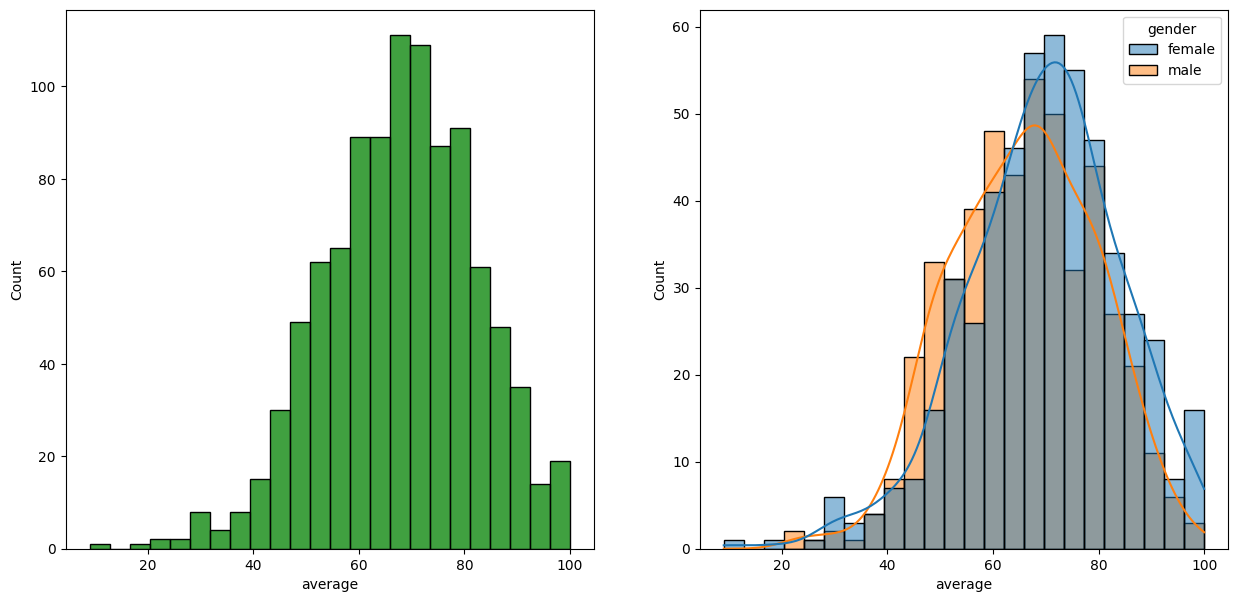

In [22]:
#visualization by histplot two different plt
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True, hue='gender')
plt.show()


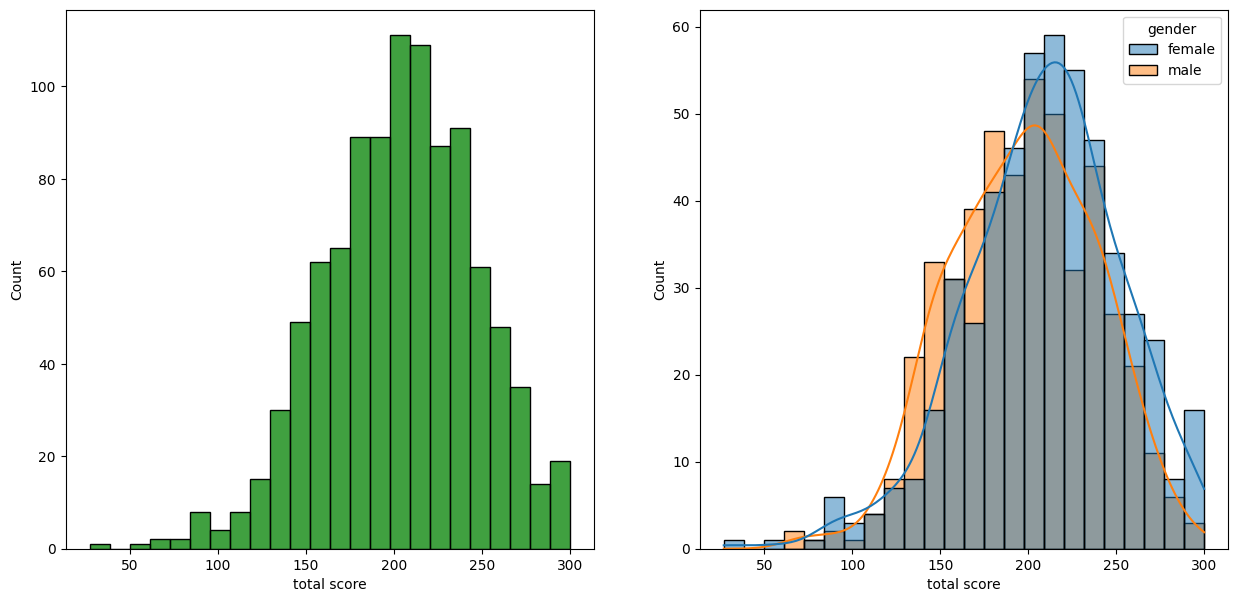

In [23]:
#same for total score
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True, hue='gender')
plt.show()